#COVID-19 no Brasil exercício de previsão de letalidade
 
 > Esse notebook foi criado apenas para por em prática o que venho estudando sobre Data Science.
 
 As fontes de dados usadas aqui vem de [United Nations](https://population.un.org/wpp/Download/Standard/CSV/)

In [0]:
import pandas as pd
from pandas.testing import assert_frame_equal
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

In [0]:
# data repository
un_population = pd.read_csv("https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_PopulationByAgeSex_Medium.csv")

# Filtrando a população mundial pelo ano de 2019 e por faixa etária
 Amostragem do Brasil
 - População total na faixa etária (milhares)

In [4]:
un_population["PopTotal"] = un_population["PopTotal"] * 1000
un_population_total = un_population.query("Time==2019")[["Location", "AgeGrp","PopTotal"]].set_index("Location")
un_population_total.query("Location=='Brazil'")

,AgeGrp,PopTotal
Location,,
Brazil,0-4,14571950.0
Brazil,5-9,14616230.0
Brazil,10-14,15151589.0
Brazil,15-19,16481486.0
Brazil,20-24,17206784.0
Brazil,25-29,16974616.0
Brazil,30-34,17262815.0
Brazil,35-39,17173369.0
Brazil,40-44,15304366.0


#Taxa de letalidade por idade
Amostra em % com base no [Global Covid-19 Case Fatality Rates](https://www.cebm.net/covid-19/global-covid-19-case-fatality-rates/)

>**Taxa de letalidade** = (*número de mortes* / *número de casos*) = *probabilidade de morrer infectado pelo vírus (%)*.
Essa probabilidade varia de acordo com a faixa etária.

As porcentagens mostradas abaixo representam o risco de morte para uma pessoa (infectada com COVID-19) em determinada faixa etária:
![COVID-19 Fatality Rate by AGE](https://raw.githubusercontent.com/infoslack/covid-19/master/data/fatality-rate.png)

Tabela retirada de [worldometers.info/coronavirus](https://www.worldometers.info/coronavirus/coronavirus-age-sex-demographics/).


#The global impact of COVID-19 and strategies for mitigation and suppression
>O documento estima que, na ausência de intervenções, o COVID-19 resultaria em 7,0 bilhões de infecções e 40 milhões de mortes em todo o mundo este ano.

Fonte: [Imperial College London](https://www.preventionweb.net/publications/view/71077)

Com estratégias de mitigação (o que a maioria dos estados está fazendo hoje no Brasil) focadas na redução nos contatos sociais e desaceleração da transmissão do vírus, estima-se que até 60% da população seja contaminada.

A previsão do estudo de que mesmo no cenário de mitigação, os sistemas de saúde em todos os países serão rapidamente sobrecarregados.
É provável que esse efeito seja mais grave em ambientes de baixa renda, onde a capacidade de atendimento é mais baixa.

#Previsão de mortes dos casos confirmados por faixa etária
Nessa previsão estou supondo que 60% da população foi infectada por COVID-19

Na amostragem por faixa etária estou incluindo os casos acima de **60 anos**  apenas.

>As estimativas do Imperial College [apresentadas nesse estudo](https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-NPI-modelling-16-03-2020.pdf) mencionam uma estratégia de mitigação por três meses, além do distanciamento social daqueles com mais de 70 anos. Presume-se que as estratégias de supressão estejam em vigor por 5 meses ou mais.

**Nota:** Na projeção estou seguindo as estimativas do Imperial College e assumindo que os casos confirmados, bem como a taxa de letalidade estão em uma linha temporal de 6 meses.

A previsão onde 60% da população total do país é infectada, utiliza a taxa de transmissão mais assumida (2 a 3) pessoas. Mas poderia ser o dobro na verdade (5,7) como [relatado no estudo](https://wwwnc.cdc.gov/eid/article/26/7/20-0282_article). A estimativa de contaminação em [ambientes fechados é bem superior (11 a 15)](https://academic.oup.com/jtm/advance-article/doi/10.1093/jtm/taaa030/5766334).

In [0]:
# Separando por categorias com base no intervalo apresentado no worldometers.info/coronavirus
pop_60_69 = un_population_total.query("Location=='Brazil' and AgeGrp>='60-64' & AgeGrp<'70-74' ").sum()
pop_70_79 = un_population_total.query("Location=='Brazil' and AgeGrp>='70-74' & AgeGrp<'80-84' ").sum()
pop_80 = un_population_total.query("Location=='Brazil' and AgeGrp>='80-84'").sum()

In [0]:
# Simulando 60% de infectados por cada grupo
total_60_69 = pop_60_69["PopTotal"] / 100 * 60
total_70_79 = pop_70_79["PopTotal"] / 100 * 60
total_80 = pop_80["PopTotal"] / 100 * 60

### Letalidade total por grupo (acima de 60 anos), esse valor seria distribuído ao longo de 6 meses na projeção

In [13]:
# Aplicando o (%) de letalidade por faixa etária para cada grupo
total_60_69 = total_60_69 / 100 * 3.6
total_70_79 = total_70_79 / 100 * 8
total_80 = total_80 / 100 * 14.8
grouped_per_age = pd.DataFrame([total_60_69,total_70_79,total_80],
                               index=["60-69","70-79","80+"])
grouped_per_age

,0
60-69,351911.1960
70-79,403252.3200
80+,352460.2536


In [14]:
soma = grouped_per_age.sum()
int(soma)

1107623

Text(0.5, 1.0, 'Comparativo de letalidade por faixa etária em grupos')

<Figure size 864x360 with 0 Axes>

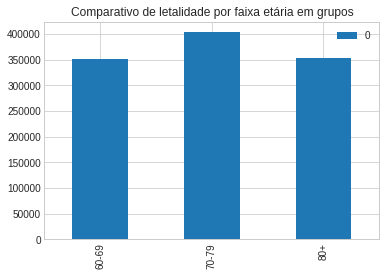

In [15]:
# Gráfico comparativo por grupo
plt.figure(figsize=(12,5))
grouped_per_age.plot(kind='bar')
plt.title("Comparativo de letalidade por faixa etária em grupos")

#TODO
- adicionar número de leitos e respiradores
- taxa de letalidade por casos graves (%)
- tentar medir o colapso